# Week 7 Problem 1

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

5. When you are ready to submit your assignment, go to Dashboard → Assignments and click the Submit button. Your work is not submitted until you click Submit.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. If your code does not pass the unit tests, it will not pass the autograder.



# Due Date: 6 PM, March 05, 2018


In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.testing import assert_array_equal, assert_array_almost_equal
from pandas.util.testing import assert_frame_equal, assert_index_equal
from nose.tools import assert_false, assert_equal, assert_almost_equal, assert_true, assert_in, assert_is_not

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

## Clustering Dataset

This dataset contains 50 columns and 100 rows. This is an example of unsupervised learning and there are no true classes that we already know. Our aim will be to find the best possible number of clusters dividing the dataset into different classes using the k-means algorithm.

In [2]:
data = pd.read_csv('/home/data_scientist/data/misc/clust_data.csv')
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,1.448417,2.194434,0.253484,3.271674,1.784326,1.314152,2.349716,1.912047,2.226564,3.388439,...,0.903844,1.825982,-1.000929,2.849224,1.959302,2.571741,4.200965,2.580996,3.321925,1.569531
1,2.611821,2.880855,1.036606,3.449158,3.062979,1.429632,1.996817,0.843128,2.421644,2.155107,...,2.049050,2.515668,1.333777,1.550993,0.448455,2.386328,4.044751,2.768179,2.216161,1.742731
2,4.764148,3.163216,1.323310,4.827628,2.620347,2.579631,2.464886,-1.033376,2.004838,3.737990,...,0.801504,1.765635,2.171325,3.643009,3.167170,0.975322,1.996791,2.463768,4.575728,0.236837
3,2.583472,3.406480,1.379676,1.887976,2.673067,1.101041,2.889585,-0.299666,2.618984,1.920240,...,2.190019,1.341497,3.059539,3.483194,1.726354,1.775252,4.848482,1.114224,3.642899,2.460097
4,1.833661,3.639340,1.876556,4.474807,4.633710,1.809670,3.600430,0.142749,2.431134,1.973526,...,3.297706,3.250237,-0.376862,2.993644,1.532155,3.179516,2.333227,0.900219,3.089761,1.360005


# Problem 1

Create a function kmean which will take 4 parameters: data, n_clusters, times and iterations and returns a list containing inertia for each value of n_clusters. Fit a Kmeans model on data using n_init=times, max_iter = iterations and random_state=23 as hyperparameters for different number of cluster values.

**HINT:** Loop through different values of n_clusters to get the inertia value for each of them. 


In [9]:
def kmean(data, n_clusters, times, iterations):
    '''   
    The function will loop through different values of n_clusters(number of clusters to form) keeping n_init=times, 
    max_iter = iterations and random_state=23 as hyperparameters and return the inertia values for each n_clusters 
    value.
    
    Parameters
    ----------
    data : dataset to be used for kmeans clustering
    n_clusters : number of clusters
    times : Number of time the k-means algorithm will be run with different centroid seeds(n_init hyperparameter)
    iterations : Maximum number of iterations of the k-means algorithm for a single run(max_iter hyperparameter)
    
    Returns
    -------
    A list of inertia(sum of total distances between points and cluster centers) values for different 
    n_clusters value.
    '''
    
    # YOUR CODE HERE
    # Search for best number of clusters, from one to ten
    distances = np.zeros(n_clusters.shape[0])

    # Perform k-means clustering for different numbers of clusters
    # Use the inertia (or sum of total distances between points
    # and cluster centers) as the performance metric.
    for idx, nc in enumerate(n_clusters):
        # We build our model for nc clusters
        model = KMeans(n_clusters=nc, n_init=times, max_iter = iterations, random_state=23)
        model.fit(data)
        distances[idx] = model.inertia_
    
    distances = distances.tolist()
    
    return distances
       

In [11]:
n_clusters = np.arange(1, 15)
distances = kmean(data, n_clusters, 10, 300)
assert_almost_equal(distances[3], 4844.9258176238227,2)
assert_almost_equal(distances[0], 7497.2370084922813,2)
assert_equal(isinstance(distances, list), True)
assert_equal(len(distances), 14)


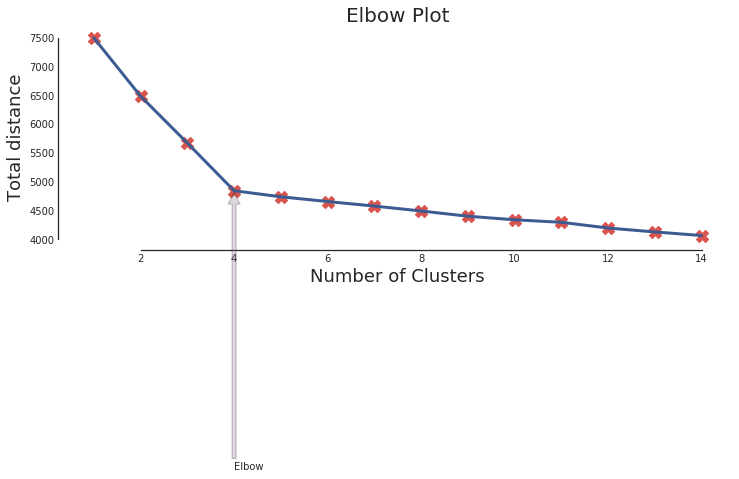

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))

# Draw points and connect them
ax.scatter(n_clusters, distances, s=150, 
           c=sns.xkcd_rgb['pale red'], marker='X', alpha=1)
ax.plot(n_clusters, distances, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['denim blue'])

# Define elbow at three clusters
elb = (n_clusters[3], distances[3])

# Draw an arrow showing the elbow
ax.annotate('Elbow', xytext=[4, 2], xy=elb,
                arrowprops=dict(facecolor=sns.xkcd_rgb['dusty purple'], 
                                alpha=0.25, shrink=0.005))

# Decorate Plot
ax.set(title='Elbow Plot', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
sns.despine(offset=5, trim=True)

# Problem 2

Create a function dist which will take 2 parameters: data and clusters and returns a tuple of 2 containing inertia value and a dictionary containing key, value pair as class, count in each class respectively. <br>
Fit a Kmeans model on data using n_clusters=clusters, n_init=10, max_iter = iterations and random_state=23 as hyperparameters. <br>
Obtain the predictions for the fitted model and create a dictionary containing class after clustering as key and the count of each class as value.


In [25]:
def dist(data, clusters):
    '''   
    Fit a Kmeans model on data using n_clusters=clusters, n_init=10, max_iter = iterations and random_state=23 
    as hyperparameters.
    
    Parameters
    ----------
    data : dataset to be used for kmeans clustering
    clusters : number of clusters
    
    Returns
    -------
    a tuple of 2 containing inertia value and a dictionary containing key, value pair as 
    class, count in each class respectively
    '''
    # YOUR CODE HERE
    # use n_clusters=clusters, n_init=10, random_state=23
    # fit the model
    model = KMeans(n_clusters=clusters, n_init=10, random_state=23)
    model.fit(data)
  
    #obtain the inertia value
    distances = model.inertia_
    
    # Obtain the predictions
    y_pred = model.predict(data).reshape(data.shape[0], 1)
    
    #obtain the dictionary
    unique, counts = np.unique(y_pred, return_counts=True)
    count = dict(zip(unique, counts))
    
    
    return (distances, count)
    

In [26]:
withinness, vals = dist(data, 4)
assert_almost_equal(withinness, 4844.9258176238227, 2)
assert_equal(isinstance(vals, dict), True)
assert_equal(len(vals), 4)
a=[]
for key, value in vals.items():
    a.append(value)
assert_equal(a[0], 25)
assert_equal(a[1], 25)
assert_equal(a[2], 25)
assert_equal(a[3], 25)

# Problem 3


For this Problem, complete the function plot creating a plot to visualize the assigned cluster in a 2D component space. The function will take 4 parameters: **transformed_center** which is cluster centers transformed to principal component space, **target** which is the classification done by clustering, **x** which is x axis and **y** which is y axis.

The following is expected in the function: <br>
Creating a figure and axes object using subplots from matplotlib.<br>
Use a list to define 4 unique colors for different clusters.<br>
Use a list to define 4 unique class names for different clusters.<br>
Plot each class separately.<br>
Plot cluster centers.<br>
Title your plot and label the x and y axis of your plot as x and y parameter value.<br>
Return the axes object, list of labels used and list of colors used for different clusters.<br>

If done correctly your plot should look *similar* to the graph below:
![Imgur](https://i.imgur.com/G6WW4m8.png)

In [116]:
def plot(transformed_center, target, x , y):
    '''       
    Parameters
    ----------
    transformed_center : cluster centers transformed to principal component space
    target : the classification done by clustering
    x : x axis and also the x axis label name(xlabel)
    y : y
    axis and also the y axis label name(ylabel)
    
    Returns
    -------
    A tuple of 3 containing the axes object, list of labels used and list of colors used for different clusters
    '''
    # YOUR CODE HERE
    # use pc dataframe that we create in the code cell below(i.e. the one which contains test cases)
    
    
    k_means = KMeans(n_clusters=4, n_init=10, random_state=23)
    k_means.fit(data)
    y_pred = k_means.predict(data).reshape(100, 1)
    cc = k_means.cluster_centers_
    pca = PCA(n_components=2, random_state=23)
    x_transformed = pca.fit_transform(data)
    
    # Data
    cols = [x, y, target]
    pc = pd.DataFrame(np.concatenate((x_transformed, y_pred), axis=1), 
                      columns = cols)
    
    colors = ['red', 'blue', 'yellow', 'green']
    labels  = list()
    legends = list()
    
    # Create Figure and axes
    fig, axs = plt.subplots(figsize=(10, 8))
  
    for idx in range(4):
        
        labels.append(idx)
        
        xx = pc[pc.target == idx]
        
        legends.append(axs.scatter(xx.iloc[:, 0], xx.iloc[:, 1], s=25,
                    color=colors[idx], alpha=0.75))
        
        #plot the cluster center
        center = axs.scatter(transformed_center[idx, 0], transformed_center[idx, 1], 
                    marker = 'x', s=120, color='black')
    
    #Decorate plot with title and labels
    axs.set(title=f'Clusters', xlabel = x, ylabel = y)
    
    axs.legend((center, legends[0], legends[1], legends[2], legends[3]),
               ('Cluster Center', 'Class 0', 'Class 1', 'Class 2', 'Class 3'),
                scatterpoints=1,
                bbox_to_anchor=(1.05, 1), loc=2,
                fontsize=14)
    
    return (axs, labels, colors)

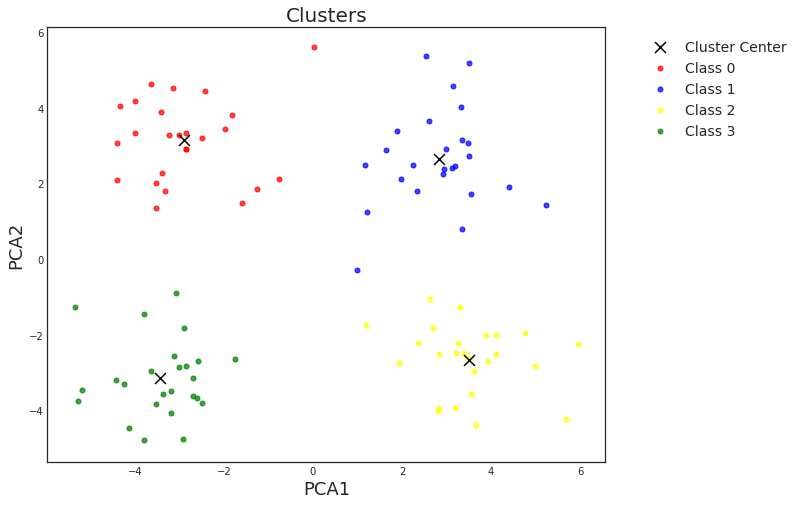

In [118]:
k_means = KMeans(n_clusters=4, n_init=10, random_state=23)
k_means.fit(data)
y_pred = k_means.predict(data).reshape(100, 1)
cc = k_means.cluster_centers_
pca = PCA(n_components=2, random_state=23)
x_transformed = pca.fit_transform(data)
cc_pca = pca.transform(cc)
    
# Data
cols = ['PCA1', 'PCA2']
dt = pd.DataFrame(data, columns = cols)
cols = ['PCA1', 'PCA2', 'target']
pc = pd.DataFrame(np.concatenate((x_transformed, y_pred), axis=1), 
                  columns = cols)

ax, labels, color = plot(cc_pca, 'target','PCA1', 'PCA2')

assert_true(isinstance(ax, mpl.axes._subplots.Axes), msg='return an axes object')
assert_false(ax.get_title() == '', msg='Set Your title')
assert_true(ax.get_xlabel() == 'PCA1', msg='Label the x axis as x')
assert_true(ax.get_ylabel() == 'PCA2', msg='Label the y axis as y')
assert_true(len(labels), 4)
assert_true(len(color), 4)
assert_true(len(np.unique(color)), 4)
assert_true(len(np.unique(labels)), 4)